In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

In [2]:
analyzer = LatticeData()

In [3]:
itheta = np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
corr_params = {"itheta": itheta, "beta": beta,"length": length,"nMC": nMC, "ntherm": ntherm}

In [4]:
G_ij = analyzer.get_corr_func(suppress_output = False,**corr_params)

nMC 10000
ntherm 0
itheta 3.141593
beta 1.6
length 20


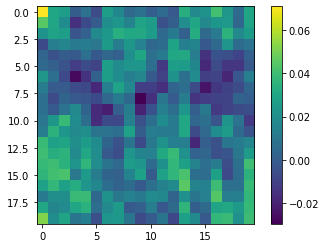

In [5]:
plt.imshow(G_ij, cmap = "viridis", aspect='equal')
plt.colorbar()
plt.show()

In [6]:
itheta = np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
single_params = {"itheta": itheta, "beta": beta,"length": length,"nMC": nMC, "ntherm": ntherm}

In [7]:
run = analyzer.get_data(single_run = True)

Missing parameters in input: 
['itheta', 'beta', 'length', 'nMC', 'ntherm']


In [8]:
run = analyzer.get_data(single_run = True, suppress_output = False, **single_params)

nMC 10000
ntherm 0
itheta 3.141593
beta 1.6
length 20


In [9]:
run = analyzer.get_data(single_run = True, **single_params)

In [10]:
run.describe()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,nMC,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
count,10000.00000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.0,...,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000
mean,4999.50000,400.0,5.653522,-2099.274591,-2117.035655,209.370779,-0.668602,-9.171576e+00,0.090441,10000.0,...,695.0,671.0,606.0,1212.0,39.309355,14.450327,8.509010e-01,-7.452829e-01,0.025072,-0.006573
std,2886.89568,0.0,12.676229,91.889155,55.569110,88.786249,0.000000,1.776446e-15,0.009168,0.0,...,0.0,0.0,0.0,0.0,10.821454,5.573036,1.110279e-16,2.220557e-16,0.020369,0.024074
min,0.00000,400.0,-0.186214,-2198.936006,-2198.936006,-205.960062,-0.668602,-9.171576e+00,0.087251,10000.0,...,695.0,671.0,606.0,1212.0,0.428375,-40.369545,8.509010e-01,-7.452829e-01,0.008161,-0.408200
25%,2499.75000,400.0,0.000000,-2143.590314,-2146.023246,153.830374,-0.668602,-9.171576e+00,0.087619,10000.0,...,695.0,671.0,606.0,1212.0,34.888588,13.118731,8.509010e-01,-7.452829e-01,0.018602,-0.009134
50%,4999.50000,400.0,-0.000000,-2124.585648,-2128.469241,240.530800,-0.668602,-9.171576e+00,0.088514,10000.0,...,695.0,671.0,606.0,1212.0,43.626231,16.404240,8.509010e-01,-7.452829e-01,0.020008,-0.007482
75%,7499.25000,400.0,4.000000,-2095.433879,-2105.945079,279.534385,-0.668602,-9.171576e+00,0.090847,10000.0,...,695.0,671.0,606.0,1212.0,47.030540,17.684321,8.509010e-01,-7.452829e-01,0.024709,-0.006967
max,9999.00000,400.0,92.845761,-551.575672,-742.436665,325.199758,-0.668602,-9.171576e+00,0.472500,10000.0,...,695.0,671.0,606.0,1212.0,50.726798,19.074180,8.509010e-01,-7.452829e-01,1.085586,0.769042


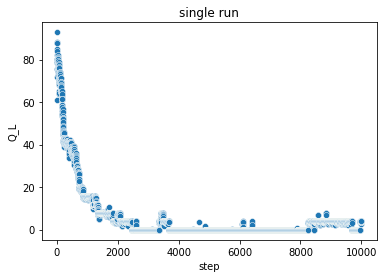

In [11]:
sns.scatterplot(data = run, x = "step", y = "Q_L")
plt.title("single run")
plt.show()

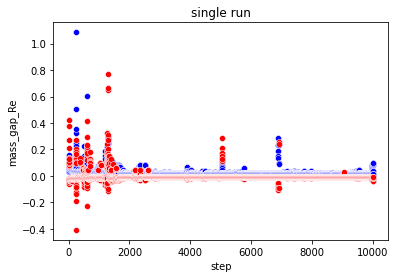

In [12]:
sns.scatterplot(data = run, x = "step", y = "mass_gap_Re", color = "blue")
sns.scatterplot(data = run, x = "step", y = "mass_gap_Im", color = "red")
plt.title("single run")
plt.show()

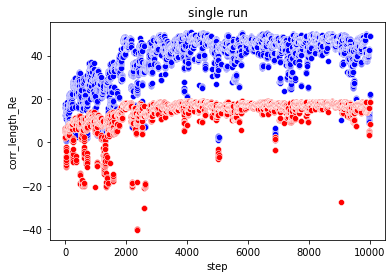

In [23]:
sns.scatterplot(data = run, x = "step", y = "corr_length_Re", color = "blue")
sns.scatterplot(data = run, x = "step", y = "corr_length_Im", color = "red")
plt.title("single run")
plt.show()

In [13]:
itheta = np.pi
beta = 1.6
filter_params = {"itheta": itheta, "beta": beta}

In [14]:
subset_df = analyzer.get_data(**filter_params)

In [15]:
subset_df["itheta"].unique()

array([3.141593])

In [16]:
subset_df["length"].unique()

array([20., 10., 40.])

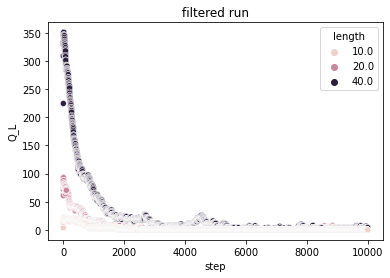

In [17]:
sns.scatterplot(data = subset_df, x = "step", y = "Q_L", hue = "length")
plt.title("filtered run")
plt.show()

In [18]:
all_data = analyzer.get_data()

In [19]:
all_data["itheta"].unique()

array([0.      , 1.570796, 3.141593, 2.356194, 0.392699, 0.785398])

In [20]:
#sns.relplot(data = all_data, x = "step", y = "Q_L", hue = "itheta", col = "length")
#plt.show()

In [21]:
df_stats = analyzer.do_stats()

In [22]:
df_stats

|phi|_mean   Q_L_mean     A_L_mean  \
length itheta   beta nMC     ntherm                                       
10.0   0.000000 1.6  10000.0 0.0          100.0  -0.007852  -534.444297   
       0.392699 1.6  10000.0 0.0          100.0   0.041516  -534.668133   
       0.785398 1.6  10000.0 0.0          100.0   0.007971  -534.865728   
       1.570796 1.6  10000.0 0.0          100.0   0.183795  -534.225198   
       2.356194 1.6  10000.0 0.0          100.0   0.521575  -532.530927   
       3.141593 1.6  100.0   0.0          100.0  18.420283  -392.545386   
                     200.0   0.0          100.0  17.430511  -416.036156   
                     1000.0  0.0          100.0  13.082149  -454.886344   
                     10000.0 0.0          100.0   1.637074  -526.287795   
20.0   0.000000 1.6  10000.0 0.0          400.0  -0.017635 -2139.025152   
       0.392699 1.6  10000.0 0.0          400.0   0.047091 -2131.288367   
       0.785398 1.6  10000.0 0.0          400.0   0.154380 -2135.436259   
       1.570796 1.6  10000.0 0.0          400.0   1.871329 -2123.982432   
       2.356194 1.6  10000.0 0.0          400.0   1.832108 -2121.892147   
       3.141593 1.6  100.0   0.0          400.0  75.457557 -1557.453924   
                     200.0   0.0          400.0  69.097232 -1652.104682   
                     1000.0  0.0          400.0  37.953332 -1880.601448   
                     10000.0 0.0          400.0   5.653522 -2099.274591   
40.0   0.000000 1.6  10000.0 0.0         1600.0  -0.033405 -8533.477749   
       0.392699 1.6  10000.0 0.0         1600.0   0.586652 -8502.916173   
       0.785398 1.6  10000.0 0.0         1600.0   1.836192 -8518.891361   
       1.570796 1.6  10000.0 0.0         1600.0   5.438097 -8497.525324   
       2.356194 1.6  10000.0 0.0         1600.0  10.437891 -8465.501891   
       3.141593 1.6  10000.0 0.0         1600.0  24.494436 -8392.531348   

                                        S_L_mean   Xi_L_mean  F_LRe_mean  \
length itheta   beta nMC     ntherm                                        
10.0   0.000000 1.6  10000.0 0.0     -534.444297   65.952342    6.964259   
       0.392699 1.6  10000.0 0.0     -534.684436   66.976951    7.581287   
       0.785398 1.6  10000.0 0.0     -534.871989   68.135968    5.722368   
       1.570796 1.6  10000.0 0.0     -534.513902   66.349597    3.009414   
       2.356194 1.6  10000.0 0.0     -533.759858   65.604348    2.595148   
       3.141593 1.6  100.0   0.0     -450.414412   17.954699    4.415365   
                     200.0   0.0     -470.795721   22.407025    4.415365   
                     1000.0  0.0     -495.985128   24.872256    4.415365   
                     10000.0 0.0     -531.430814   60.944428    4.415365   
20.0   0.000000 1.6  10000.0 0.0    -2139.025152  247.731330  -10.451628   
       0.392699 1.6  10000.0 0.0    -2131.306859  217.093296   -8.477229   
       0.785398 1.6  10000.0 0.0    -2135.557509  246.087816   -6.483556   
       1.570796 1.6  10000.0 0.0    -2126.921909  210.153553   -4.911029   
       2.356194 1.6  10000.0 0.0    -2126.208951  220.683509   -4.629648   
       3.141593 1.6  100.0   0.0    -1794.510830   21.104203   -0.668602   
                     200.0   0.0    -1869.180039   33.770486   -0.668602   
                     1000.0  0.0    -1999.835356   63.862712   -0.668602   
                     10000.0 0.0    -2117.035655  209.370779   -0.668602   
40.0   0.000000 1.6  10000.0 0.0    -8533.477749  763.451971  -21.588948   
       0.392699 1.6  10000.0 0.0    -8503.146550  234.743056  -19.811708   
       0.785398 1.6  10000.0 0.0    -8520.333503  508.660007  -22.292762   
       1.570796 1.6  10000.0 0.0    -8506.067467  594.686239  -10.987296   
       2.356194 1.6  10000.0 0.0    -8490.095594  564.546193   -9.279060   
       3.141593 1.6  10000.0 0.0    -8469.482887  643.323881   -5.745333   

                                     F_LIm_mean  acc_mean  Q_L_ta  A_L_ta  \
length itheta   beta nMC     nth